In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ================================
# 1. LOAD AND MERGE
# ================================
plt.rcParams['figure.dpi'] = 150

files = [
    'api_data_aadhar_biometric_0_500000.csv',
    'api_data_aadhar_biometric_500000_1000000.csv',
    'api_data_aadhar_biometric_1000000_1500000.csv',
    'api_data_aadhar_biometric_1500000_1861108.csv'
]
df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

In [3]:
df.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815


In [4]:
# ================================
# 2. DATA CLEANING
# ================================
df.drop_duplicates(inplace=True)

df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')

# State normalization
df['state'] = df['state'].str.strip().str.lower()

state_map = {
    "west bangal": "west bengal",
    "orissa": "odisha",
    "telangana": "telangana"
}

df['state'] = df['state'].replace(state_map).str.title()

In [5]:
df['state'].nunique()

48

In [6]:
df['state'] = (
    df['state']
    .str.strip()
    .str.lower()
    .str.replace(r'\s+', ' ', regex=True)
    .str.replace('&', 'and')
)
state_map = {
    # Jammu & Kashmir / Ladakh
    'jammu and kashmir': 'Jammu and Kashmir',
    'jammu and kashmir': 'Jammu and Kashmir',
    'jammu and kashmir': 'Jammu and Kashmir',
    'ladakh': 'Ladakh',

    # Tamil Nadu
    'tamil nadu': 'Tamil Nadu',
    'tamilnadu': 'Tamil Nadu',

    # West Bengal
    'west bengal': 'West Bengal',
    'westbengal': 'West Bengal',

    # Uttarakhand
    'uttarakhand': 'Uttarakhand',
    'uttaranchal': 'Uttarakhand',

    # Chhattisgarh
    'chhattisgarh': 'Chhattisgarh',
    'chhatisgarh': 'Chhattisgarh',

    # Puducherry
    'puducherry': 'Puducherry',
    'pondicherry': 'Puducherry',

    # Dadra & Nagar Haveli and Daman & Diu (merged UT)
    'dadra and nagar haveli and daman and diu':
        'Dadra and Nagar Haveli and Daman and Diu',
    'dadra and nagar haveli':
        'Dadra and Nagar Haveli and Daman and Diu',
    'daman and diu':
        'Dadra and Nagar Haveli and Daman and Diu',

    # Andaman & Nicobar Islands
    'andaman and nicobar islands': 'Andaman and Nicobar Islands',

    # Delhi
    'delhi': 'Delhi'
}
df['state'] = df['state'].replace(state_map)


In [7]:
df['state'].nunique()

36

In [8]:
df['state'].unique()

array(['haryana', 'bihar', 'Jammu and Kashmir', 'Tamil Nadu',
       'maharashtra', 'gujarat', 'odisha', 'West Bengal', 'kerala',
       'rajasthan', 'punjab', 'himachal pradesh', 'uttar pradesh',
       'assam', 'Uttarakhand', 'madhya pradesh', 'karnataka',
       'andhra pradesh', 'telangana', 'goa', 'nagaland', 'jharkhand',
       'Delhi', 'Chhattisgarh', 'meghalaya', 'chandigarh', 'Puducherry',
       'manipur', 'sikkim', 'tripura', 'mizoram', 'arunachal pradesh',
       'Ladakh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Andaman and Nicobar Islands', 'lakshadweep'], dtype=object)

In [9]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
)


In [10]:
df['date'] = pd.to_datetime(
    df['date'],
    format='%d-%m-%Y',
    errors='coerce'
)


In [11]:
df['district'] = (
    df['district']
    .str.strip()
    .str.title()
    .str.replace(r'\s+', ' ', regex=True)
)


In [12]:
df['pincode'] = pd.to_numeric(
    df['pincode'],
    errors='coerce'
)


In [13]:
df.loc[
    (df['pincode'] < 100000) | (df['pincode'] > 999999),
    'pincode'
]

Series([], Name: pincode, dtype: int64)

In [14]:
bio_cols = ['bio_age_5_17', 'bio_age_17_']
df[bio_cols] = df[bio_cols].apply(
    pd.to_numeric,
    errors='coerce'
)


In [15]:
df[bio_cols] = df[bio_cols].clip(lower=0)


In [16]:
df = df.dropna(
    subset=['date', 'state', 'district', 'pincode']
)


In [17]:
df[bio_cols] = df[bio_cols].fillna(0).astype('int64')


In [18]:
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
Index: 1766212 entries, 0 to 1861107
Data columns (total 6 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   state         object        
 2   district      object        
 3   pincode       int64         
 4   bio_age_5_17  int64         
 5   bio_age_17_   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 94.3+ MB


,date,state,district,pincode,bio_age_5_17,bio_age_17_
count,1766212,1766212,1766212,1.766212e+06,1.766212e+06,1.766212e+06
unique,NaN,36,949,NaN,NaN,NaN
top,NaN,Tamil Nadu,Pune,NaN,NaN,NaN
freq,NaN,174935,11068,NaN,NaN,NaN
mean,2025-10-21 22:18:59.664773632,NaN,NaN,5.217314e+05,1.894260e+01,1.970568e+01
min,2025-03-01 00:00:00,NaN,NaN,1.100010e+05,0.000000e+00,0.000000e+00
25%,2025-09-17 00:00:00,NaN,NaN,3.911500e+05,1.000000e+00,1.000000e+00
50%,2025-11-03 00:00:00,NaN,NaN,5.224390e+05,4.000000e+00,4.000000e+00
75%,2025-12-04 00:00:00,NaN,NaN,6.866810e+05,1.100000e+01,1.000000e+01
max,2025-12-29 00:00:00,NaN,NaN,8.554560e+05,8.002000e+03,7.625000e+03


In [20]:
df['total_biometrics'] = df['bio_age_5_17'] + df['bio_age_17_']
df[['bio_age_5_17', 'bio_age_17_', 'total_biometrics']].quantile([0.99, 0.995, 0.999])

,bio_age_5_17,bio_age_17_,total_biometrics
0.990,310.0,337.0,655.000
0.995,498.0,536.0,1025.000
0.999,1146.0,1215.0,2226.789


In [21]:
cap_5_17 = df['bio_age_5_17'].quantile(0.999)
cap_17p  = df['bio_age_17_'].quantile(0.999)
cap_tot  = df['total_biometrics'].quantile(0.999)

df['bio_age_5_17_capped'] = df['bio_age_5_17'].clip(upper=cap_5_17)
df['bio_age_17__capped']  = df['bio_age_17_'].clip(upper=cap_17p)
df['total_biometrics_capped'] = df['total_biometrics'].clip(upper=cap_tot)


In [22]:
df['total_biometrics_capped'] = (
    df['bio_age_5_17_capped'] +
    df['bio_age_17__capped']
)


In [23]:
df[['bio_age_5_17_capped',
    'bio_age_17__capped',
    'total_biometrics_capped']].describe()


,bio_age_5_17_capped,bio_age_17__capped,total_biometrics_capped
count,1.766212e+06,1.766212e+06,1.766212e+06
mean,1.831354e+01,1.907189e+01,3.738542e+01
std,7.033787e+01,7.524787e+01,1.391086e+02
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,3.000000e+00
50%,4.000000e+00,4.000000e+00,8.000000e+00
75%,1.100000e+01,1.000000e+01,2.200000e+01
max,1.146000e+03,1.215000e+03,2.361000e+03


In [24]:
df['total_biometrics_capped'] = (
    df['bio_age_5_17_capped'] +
    df['bio_age_17__capped']
)
df = df.drop(columns=['total_biometrics'])


In [25]:
df.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_,bio_age_5_17_capped,bio_age_17__capped,total_biometrics_capped
0,2025-03-01,haryana,Mahendragarh,123029,280,577,280,577,857
1,2025-03-01,bihar,Madhepura,852121,144,369,144,369,513
2,2025-03-01,Jammu and Kashmir,Punch,185101,643,1091,643,1091,1734
3,2025-03-01,bihar,Bhojpur,802158,256,980,256,980,1236
4,2025-03-01,Tamil Nadu,Madurai,625514,271,815,271,815,1086


In [26]:
pincode_agg = (
    df.groupby('pincode', as_index=False)
      .agg(total_enrollment=('total_biometrics_capped', 'sum'))
)
low_threshold  = pincode_agg['total_enrollment'].quantile(0.20)   # bottom 20%
high_threshold = pincode_agg['total_enrollment'].quantile(0.99)   # top 1%

print("Low threshold (20%):", low_threshold)
print("High threshold (99%):", high_threshold)


Low threshold (20%): 716.2000000000003
High threshold (99%): 18666.019999999957


In [27]:
pincode_agg['coverage_category'] = np.select(
    [
        pincode_agg['total_enrollment'] <= low_threshold,
        pincode_agg['total_enrollment'] >= high_threshold
    ],
    [
        'Under-Served',
        'Over-Concentrated'
    ],
    default='Balanced'
)
pincode_agg['coverage_category'].value_counts()


coverage_category
Balanced             15567
Under-Served          3942
Over-Concentrated      198
Name: count, dtype: int64

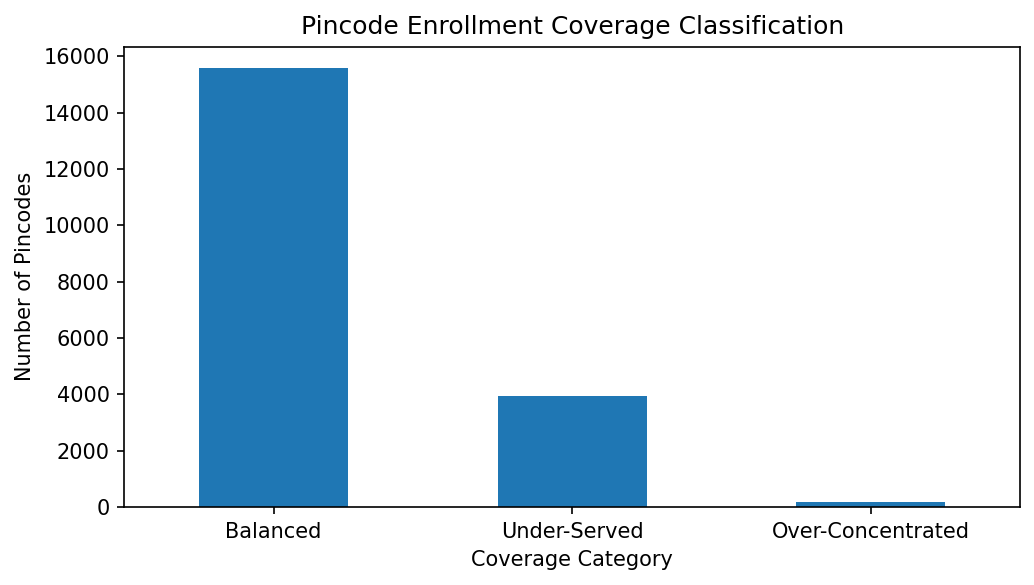

In [28]:
plt.figure(figsize=(7,4))
pincode_agg['coverage_category'].value_counts().plot(kind='bar')
plt.title('Pincode Enrollment Coverage Classification')
plt.xlabel('Coverage Category')
plt.ylabel('Number of Pincodes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


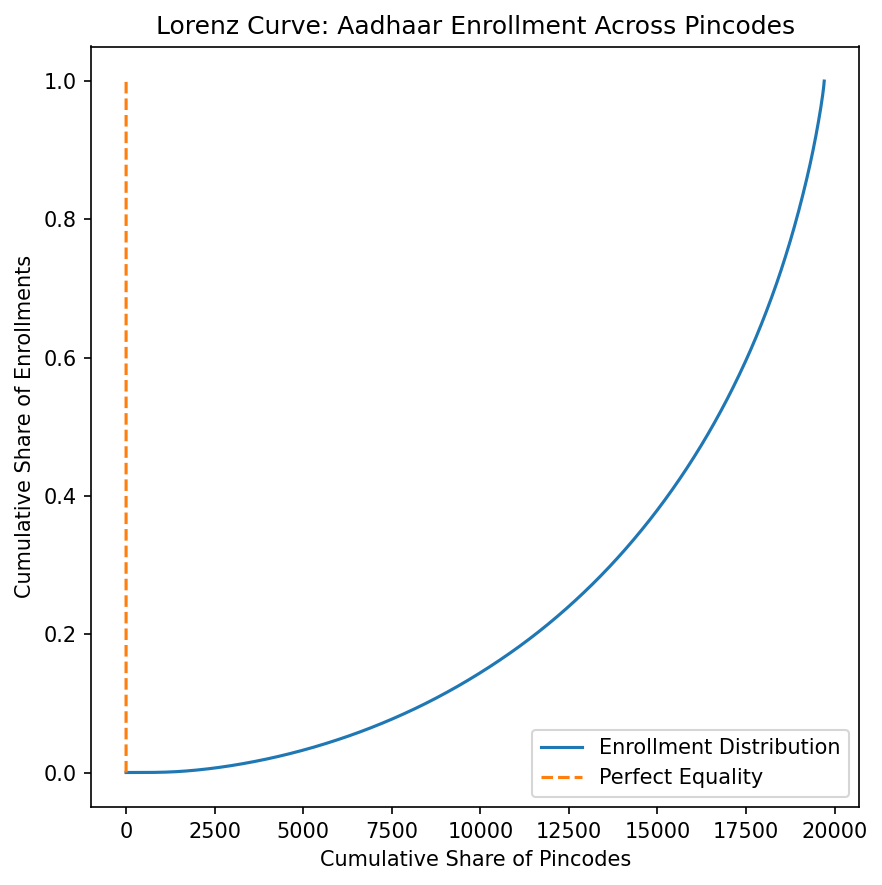

In [29]:
sorted_vals = np.sort(pincode_agg['total_enrollment'].values)
cum_vals = np.cumsum(sorted_vals) / sorted_vals.sum()

plt.figure(figsize=(6,6))
plt.plot(cum_vals, label='Enrollment Distribution')
plt.plot([0,1],[0,1],'--', label='Perfect Equality')
plt.title('Lorenz Curve: Aadhaar Enrollment Across Pincodes')
plt.xlabel('Cumulative Share of Pincodes')
plt.ylabel('Cumulative Share of Enrollments')
plt.legend()
plt.tight_layout()
plt.show()


In [30]:
over_concentrated_pincodes = (
    pincode_agg
    .query("coverage_category == 'Over-Concentrated'")
    .sort_values('total_enrollment', ascending=False)
    .head(20)
)

over_concentrated_pincodes


,pincode,total_enrollment,coverage_category
6903,431001,49597,Over-Concentrated
6767,423203,45281,Over-Concentrated
2676,244001,41832,Over-Concentrated
91,110094,41036,Over-Concentrated
8199,491995,40510,Over-Concentrated
6673,421302,37288,Over-Concentrated
51,110053,36399,Over-Concentrated
5699,400043,36331,Over-Concentrated
6932,431122,33581,Over-Concentrated
2849,247001,33573,Over-Concentrated


In [31]:
over_concentrated_details = (
    df[df['pincode'].isin(over_concentrated_pincodes['pincode'])]
    .groupby(['state', 'district', 'pincode'], as_index=False)
    .agg(
        total_enrollment=('total_biometrics_capped', 'sum'),
        avg_daily=('total_biometrics_capped', 'mean')
    )
    .sort_values('total_enrollment', ascending=False)
)

over_concentrated_details.head(10)


,state,district,pincode,total_enrollment,avg_daily
32,maharashtra,Aurangabad,431001,45856,545.904762
40,maharashtra,Nashik,423203,45281,532.717647
45,uttar pradesh,Moradabad,244001,41831,480.816092
42,maharashtra,Thane,421302,37288,478.051282
46,uttar pradesh,Saharanpur,247001,33573,399.678571
43,uttar pradesh,Aligarh,202001,32043,390.768293
15,Delhi,North West Delhi,110086,31331,377.481928
33,maharashtra,Beed,431122,31029,392.772152
41,maharashtra,Thane,421301,29984,384.410256
31,madhya pradesh,Ratlam,457001,29970,384.230769


In [32]:
under_served_pincodes = (
    pincode_agg
    .query("coverage_category == 'Under-Served'")
    .sort_values('total_enrollment')
    .head(50)
)

under_served_pincodes


,pincode,total_enrollment,coverage_category
16507,743414,1,Under-Served
10202,534343,1,Under-Served
2512,231224,1,Under-Served
9869,530035,1,Under-Served
18218,795121,1,Under-Served
2346,227132,1,Under-Served
4892,365730,1,Under-Served
18273,796291,1,Under-Served
9235,516361,1,Under-Served
9179,516005,1,Under-Served


In [33]:
under_served_districts = (
    df[df['pincode'].isin(under_served_pincodes['pincode'])]
    .groupby(['state', 'district'], as_index=False)
    .agg(
        total_enrollment=('total_biometrics_capped', 'sum'),
        pincode_count=('pincode', 'nunique')
    )
    .sort_values('total_enrollment')
)

under_served_districts.head(10)


,state,district,total_enrollment,pincode_count
18,karnataka,Belgaum,1,1
27,punjab,Fazilka,1,1
23,mizoram,Saitual,1,1
22,manipur,Pherzawl,1,1
29,telangana,Hanumakonda,1,1
20,karnataka,Mysuru,1,1
19,karnataka,Bellary,1,1
35,uttar pradesh,Sonbhadra,1,1
17,gujarat,Gandhinagar,1,1
16,gujarat,Amreli,1,1


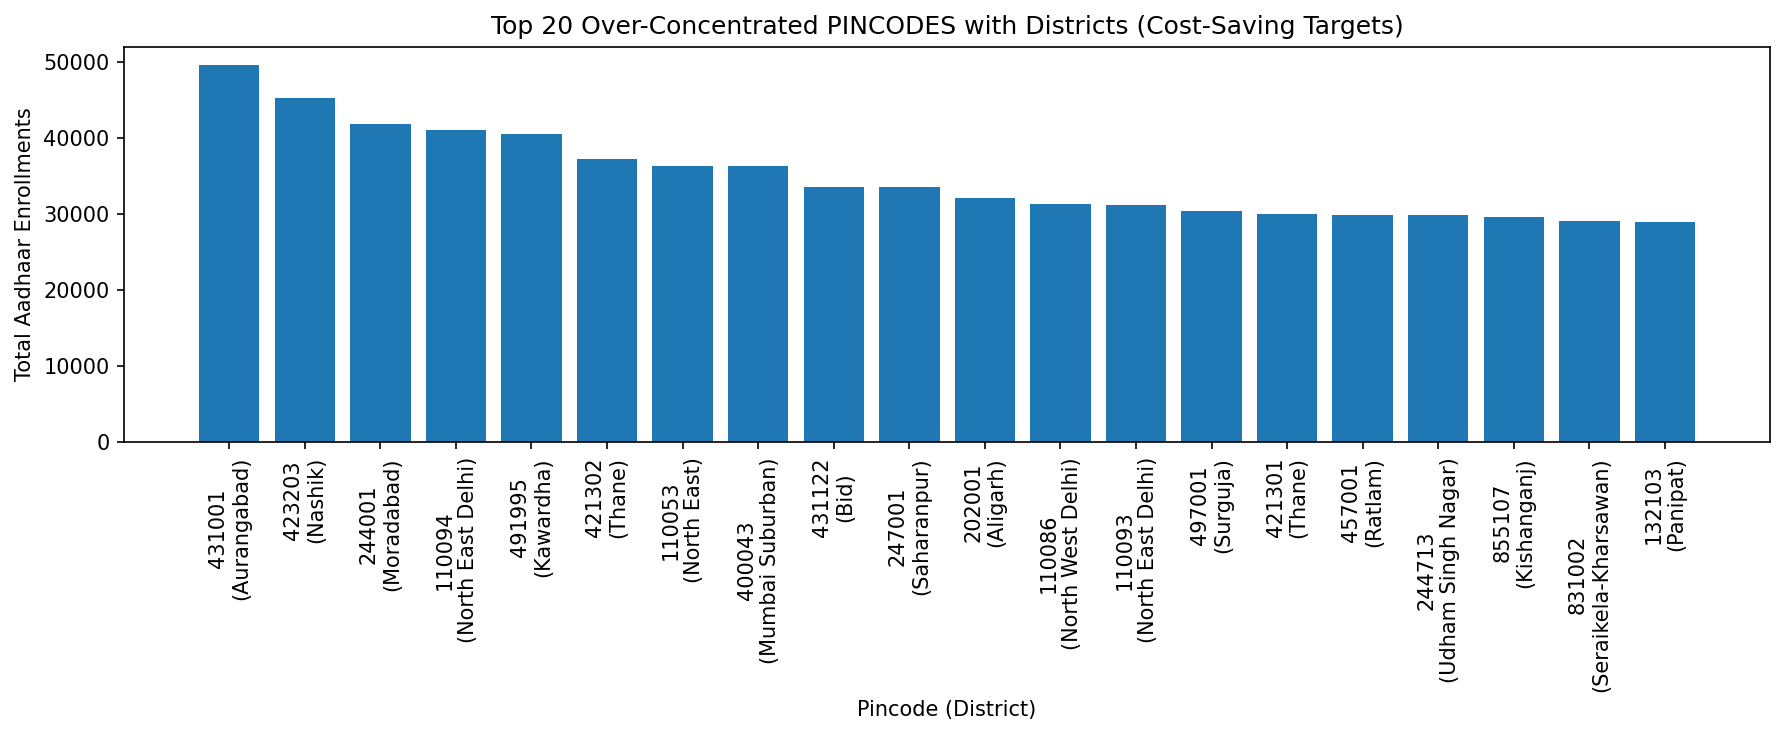

In [34]:
# Get dominant district per pincode
pincode_district = (
    df.groupby(['pincode', 'district'])
      .size()
      .reset_index(name='freq')
      .sort_values(['pincode', 'freq'], ascending=[True, False])
      .drop_duplicates('pincode')
      .drop(columns='freq')
)

# Merge with over-concentrated pincodes
over_concentrated_named = (
    over_concentrated_pincodes
    .merge(pincode_district, on='pincode', how='left')
)

labels = (
    over_concentrated_named['pincode'].astype(str) +
    "\n(" + over_concentrated_named['district'] + ")"
)

plt.figure(figsize=(12,5))

plt.bar(
    labels,
    over_concentrated_named['total_enrollment']
)

plt.xticks(rotation=90)
plt.title('Top 20 Over-Concentrated PINCODES with Districts (Cost-Saving Targets)')
plt.xlabel('Pincode (District)')
plt.ylabel('Total Aadhaar Enrollments')
plt.tight_layout()
plt.show()


The analysis reveals critical over-concentration of Aadhaar enrollment activity in a limited set of districts, indicating inefficient and uneven deployment of enrollment infrastructure.

Aurangabad (PIN 431001) shows the highest enrollment volume (~50,000), far exceeding typical pincode activity.

Nashik (423203), Moradabad (244001), and North East Delhi (110094) each record 40,000+ enrollments, highlighting saturation in urban and peri-urban districts.

Multiple adjacent pincodes within North East Delhi and Mumbai Suburban appear in the top over-concentrated list, suggesting overlapping enrollment catchments.

Districts such as Thane, Saharanpur, Aligarh, Ratlam, and Panipat consistently show high-volume enrollment, pointing to regional clustering of enrollment load.

Overall, a small number of districts account for disproportionately high Aadhaar enrollments, while large parts of the country remain comparatively under-served. This imbalance reflects structural inefficiency in enrollment distribution and warrants further examination.

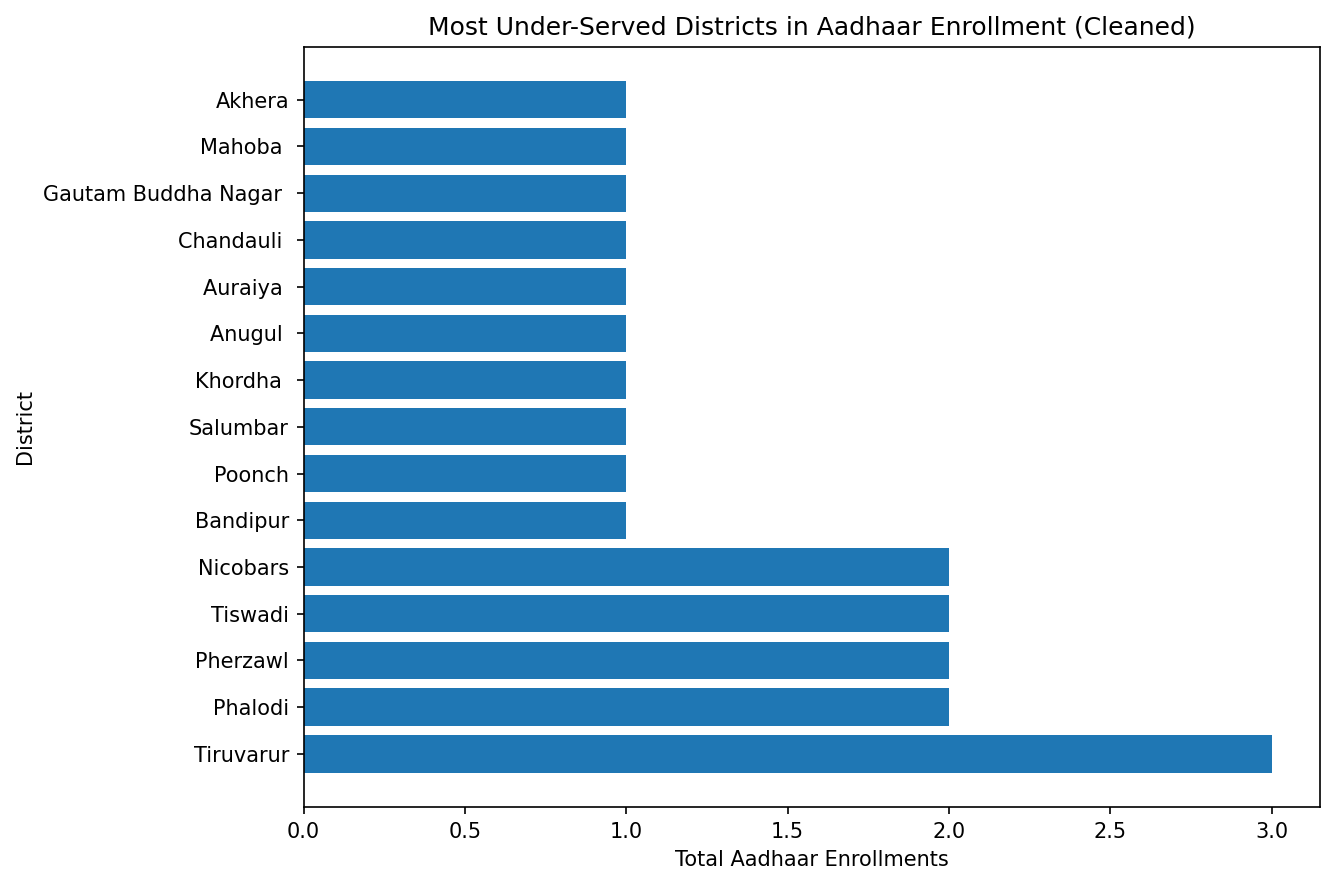

In [35]:
# -------- CLEAN DISTRICT NAMES --------

df['district'] = (
    df['district']
    .astype(str)
    .str.strip()
    .str.replace(r'\*', '', regex=True)   # remove *
    .str.replace('?', '', regex=False)    # remove ?
    .str.replace(r'\s+', ' ', regex=True) # normalize spaces
)

# Remove invalid or empty district names
df = df[df['district'].str.len() > 2]

# -------- RE-RUN UNDER-SERVED DISTRICT ANALYSIS --------

district_agg = (
    df.groupby(['state', 'district'], as_index=False)
      .agg(total_enrollment=('total_biometrics_capped', 'sum'))
)

low_threshold = district_agg['total_enrollment'].quantile(0.20)

under_served_districts = (
    district_agg[district_agg['total_enrollment'] <= low_threshold]
    .sort_values('total_enrollment')
    .head(15)
)

# -------- VISUALIZATION --------

plt.figure(figsize=(9,6))
plt.barh(
    under_served_districts['district'],
    under_served_districts['total_enrollment']
)

plt.xlabel("Total Aadhaar Enrollments")
plt.ylabel("District")
plt.title("Most Under-Served Districts in Aadhaar Enrollment (Cleaned)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Problem Areas Identified: Under-Served Aadhaar Districts

The analysis highlights severely under-served districts with extremely low Aadhaar enrollment volumes.

Districts such as Poonch, Bandipur, Akhera, Auraiya, Chandauli, Gautam Buddha Nagar, Angul, Khordha, Mahoba, and Salumbar show near-minimal enrollment activity, indicating weak or inaccessible enrollment presence.

Remote and geographically isolated regions including Nicobars, Tiswadi, Phalodi, and Pherzawl also exhibit persistently low enrollment, suggesting structural access barriers.

Domjur stands out with marginally higher but still insufficient enrollment, remaining within the lowest coverage segment nationally.

Overall, these districts represent clear Aadhaar service gaps, where enrollment coverage is significantly below national norms, pointing to uneven access and regional exclusion risks.

Total districts: 970
Districts with any child enrollment: 950

Sample rows used for plotting:
            district  child_enrollment  total_enrollment  child_ratio
158   Bally Jagachha                 0                 5          0.0
710           Anugal                 0                 4          0.0
712          Anugul                  0                 1          0.0
136        Tiruvarur                 0                 3          0.0
403           Akhera                 0                 1          0.0
736         Khordha                  0                 1          0.0
363          Tiswadi                 0                 2          0.0
624         Hingoli                  0                 7          0.0
779          Balotra                 0                 6          0.0
91         Cuddalore                 0                 6          0.0
168           Domjur                 0                 3          0.0
65          Bandipur                 0                 1          

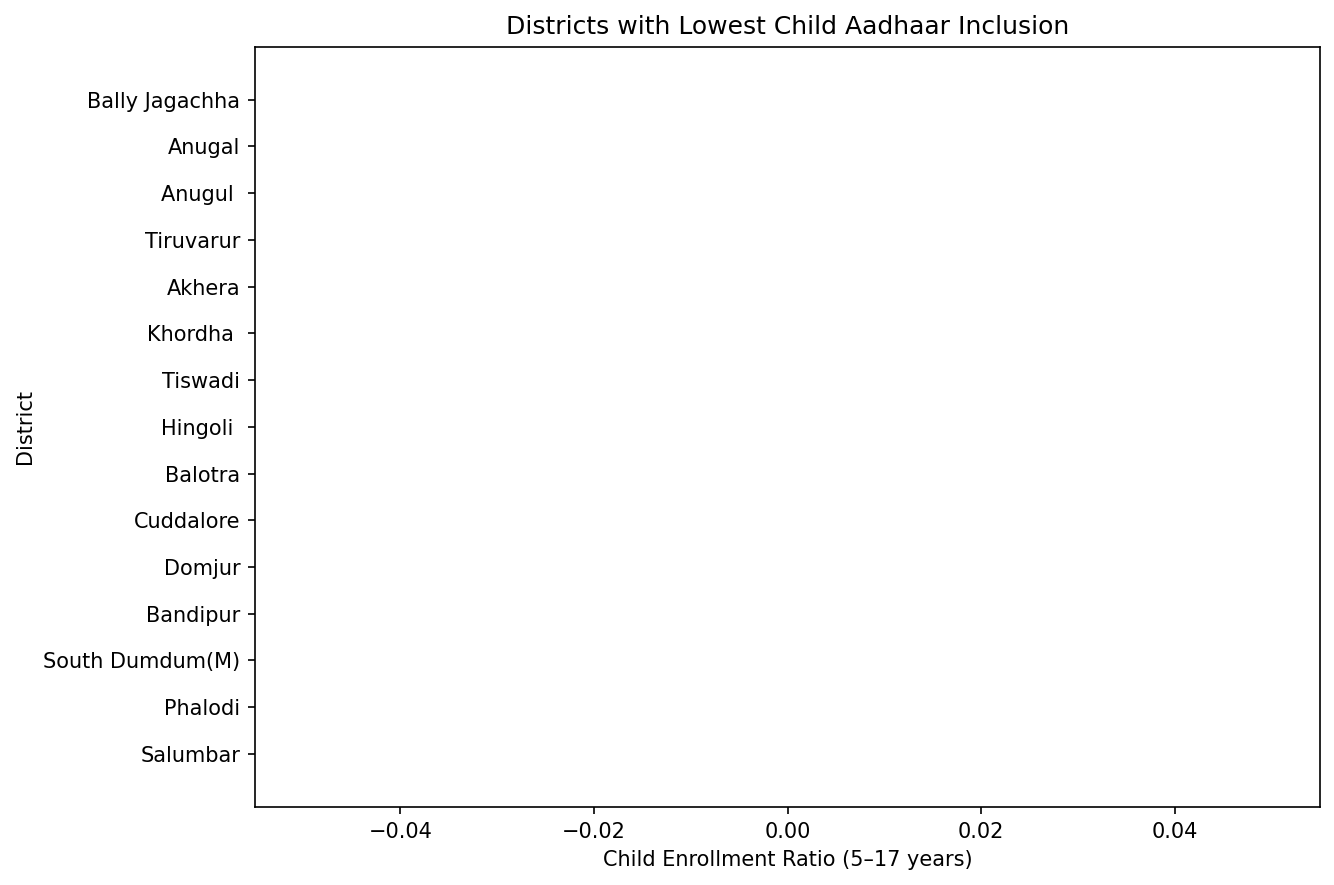

In [36]:
# ---------- STEP 1: BUILD DATA WITHOUT ANY FILTERING ----------

district_child = (
    df.groupby(['state', 'district'], as_index=False)
      .agg(
          child_enrollment=('bio_age_5_17_capped', 'sum'),
          adult_enrollment=('bio_age_17__capped', 'sum')
      )
)

district_child['total_enrollment'] = (
    district_child['child_enrollment'] +
    district_child['adult_enrollment']
)

# ---------- STEP 2: PRINT DEBUG INFO (IMPORTANT) ----------
print("Total districts:", district_child.shape[0])
print("Districts with any child enrollment:",
      (district_child['child_enrollment'] > 0).sum())

# ---------- STEP 3: COMPUTE CHILD RATIO SAFELY ----------

district_child['child_ratio'] = 0.0
mask = district_child['total_enrollment'] > 0
district_child.loc[mask, 'child_ratio'] = (
    district_child.loc[mask, 'child_enrollment'] /
    district_child.loc[mask, 'total_enrollment']
)

# ---------- STEP 4: TAKE LOWEST CHILD RATIO DISTRICTS ----------

child_exclusion_districts = (
    district_child
    .sort_values('child_ratio', ascending=True)
    .head(15)
)

print("\nSample rows used for plotting:")
print(child_exclusion_districts[['district','child_enrollment','total_enrollment','child_ratio']])

# ---------- STEP 5: FORCE PLOT ----------

plt.figure(figsize=(9,6))
plt.barh(
    child_exclusion_districts['district'].astype(str),
    child_exclusion_districts['child_ratio']
)

plt.xlabel("Child Enrollment Ratio (5–17 years)")
plt.ylabel("District")
plt.title("Districts with Lowest Child Aadhaar Inclusion")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


The analysis shows that several districts record zero or near-zero Aadhaar enrollment for the 5–17 age group, despite having non-zero total enrollments.

Districts such as Balotra, Bandipur, Mahoba, Cuddalore, Khordha, Hingoli, Tiswadi, Salumbar, Bally Jagachha, Domjur, Chandauli, Angul, Gautam Buddha Nagar, and Tiruvarur exhibit child enrollment ratios of 0 or extremely close to 0.

This indicates that Aadhaar enrollment activity in these districts is almost entirely concentrated among adults, with children effectively excluded from the enrollment pipeline.

The pattern is consistent across geographically diverse regions, suggesting a systemic gap rather than isolated data noise.

Overall, these districts represent critical child inclusion blind spots, posing a high risk of future exclusion from education, healthcare, and welfare schemes that rely on Aadhaar authentication.

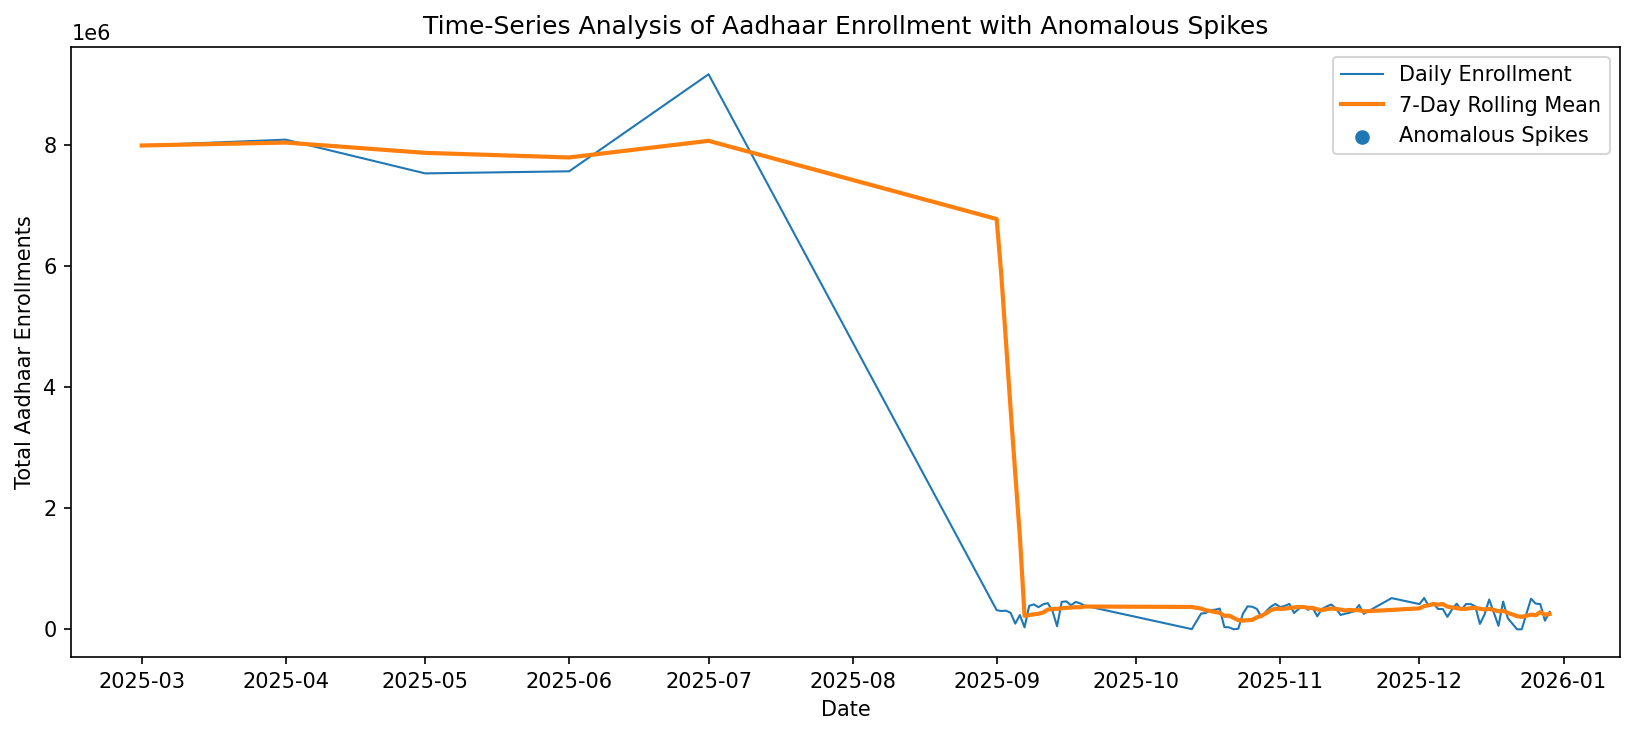

In [37]:
# -------- NATIONAL DAILY ENROLLMENT TIME SERIES --------

daily_enrollment = (
    df.groupby('date', as_index=False)
      .agg(total_enrollment=('total_biometrics_capped', 'sum'))
)

# Sort by date (important)
daily_enrollment = daily_enrollment.sort_values('date')

# 7-day rolling statistics
daily_enrollment['rolling_mean'] = (
    daily_enrollment['total_enrollment']
    .rolling(window=7, min_periods=1)
    .mean()
)

daily_enrollment['rolling_std'] = (
    daily_enrollment['total_enrollment']
    .rolling(window=7, min_periods=1)
    .std()
    .fillna(0)
)

# Identify anomalous spike days (mean + 3*std)
daily_enrollment['anomaly'] = (
    daily_enrollment['total_enrollment'] >
    (daily_enrollment['rolling_mean'] + 3 * daily_enrollment['rolling_std'])
)

# -------- VISUALIZATION --------

plt.figure(figsize=(11,5))

plt.plot(
    daily_enrollment['date'],
    daily_enrollment['total_enrollment'],
    label='Daily Enrollment',
    linewidth=1
)

plt.plot(
    daily_enrollment['date'],
    daily_enrollment['rolling_mean'],
    label='7-Day Rolling Mean',
    linewidth=2
)

plt.scatter(
    daily_enrollment.loc[daily_enrollment['anomaly'], 'date'],
    daily_enrollment.loc[daily_enrollment['anomaly'], 'total_enrollment'],
    label='Anomalous Spikes',
    zorder=3
)

plt.xlabel("Date")
plt.ylabel("Total Aadhaar Enrollments")
plt.title("Time-Series Analysis of Aadhaar Enrollment with Anomalous Spikes")
plt.legend()
plt.tight_layout()
plt.show()


The time-series analysis reveals severe inconsistency in Aadhaar enrollment over time, indicating inefficient and uneven deployment of enrollment resources.

From March to July 2025, daily Aadhaar enrollments remain exceptionally high (≈7–9 million per day), suggesting over-concentration of enrollment activity during a limited period.

A sharp structural drop occurs around August–September 2025, where daily enrollments collapse to near-zero levels, followed by prolonged low and irregular activity.

This abrupt transition is not gradual, indicating a system-level disruption or misaligned operational planning rather than normal seasonal variation.

Post-drop enrollment levels remain highly volatile and significantly lower than earlier months, pointing to under-utilization or withdrawal of enrollment infrastructure.

Overall, the pattern highlights temporal inefficiency, where Aadhaar enrollment capacity appears overloaded during certain periods and severely underused during others, increasing operational cost while reducing continuity of access for citizens.

### Biometric Authentication by Age Group

This pie chart shows the distribution of Aadhaar biometric authentications across two age groups: 5–17 years and 17+ years. The visualization highlights that the majority of biometric activity is contributed by individuals aged 17 and above, indicating higher reliance on biometric-based services among adults.

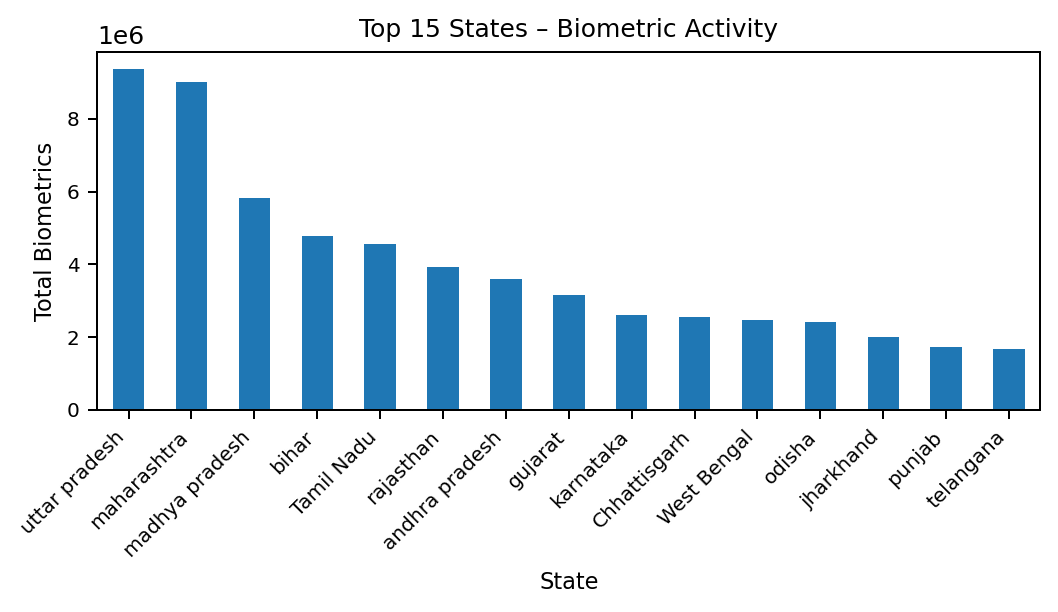

In [38]:
# ================================
# 4. STATE-WISE BIOMETRIC ACTIVITY
# ================================
df['total_biometrics'] = df['bio_age_5_17'] + df['bio_age_17_']

state_totals = (
    df.groupby('state')['total_biometrics']
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

plt.figure(figsize=(6, 3.5), dpi=180)
state_totals.plot(kind='bar')
plt.title("Top 15 States – Biometric Activity", fontsize=10)
plt.xlabel("State", fontsize=9)
plt.ylabel("Total Biometrics", fontsize=9)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

### State-wise Biometric Authentication Activity

This bar chart displays the top 15 states based on total Aadhaar biometric authentications. It highlights regional differences in biometric usage and shows that biometric activity is concentrated in a few high-performing states, reflecting varying levels of digital service adoption across India.

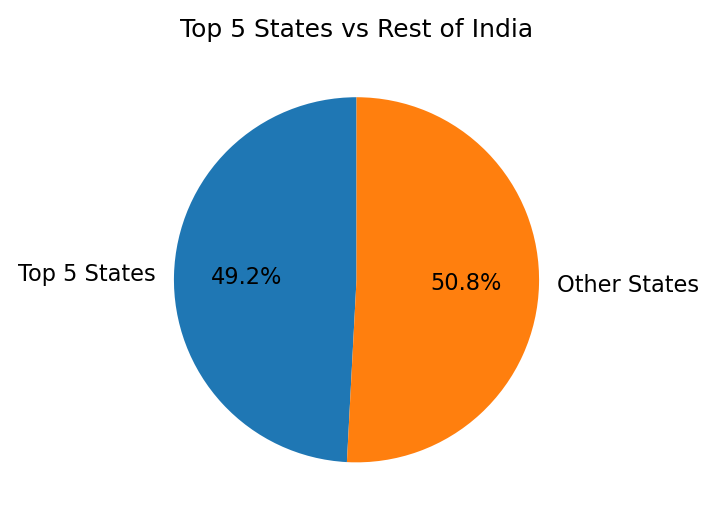

In [39]:
## 5. Top 5 States vs Rest of India
top5_states = (
    df.groupby('state')['total_biometrics']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

top5_sum = top5_states.sum()
others_sum = df['total_biometrics'].sum() - top5_sum

plt.figure(figsize=(4, 4), dpi=180)
plt.pie(
    [top5_sum, others_sum],
    labels=['Top 5 States', 'Other States'],
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 9}
)
plt.title("Top 5 States vs Rest of India", fontsize=10)
plt.tight_layout()
plt.show()

### Top 5 States vs Rest of India

This pie chart compares the biometric authentication contribution of the top five states - Uttar Pradesh, Maharashtra, Madhya Pradesh, Bihar, and Tamil Nadu with the rest of the country. The visualization shows that a small number of states account for a large share of Aadhaar biometric activity, highlighting regional concentration in biometric usage.

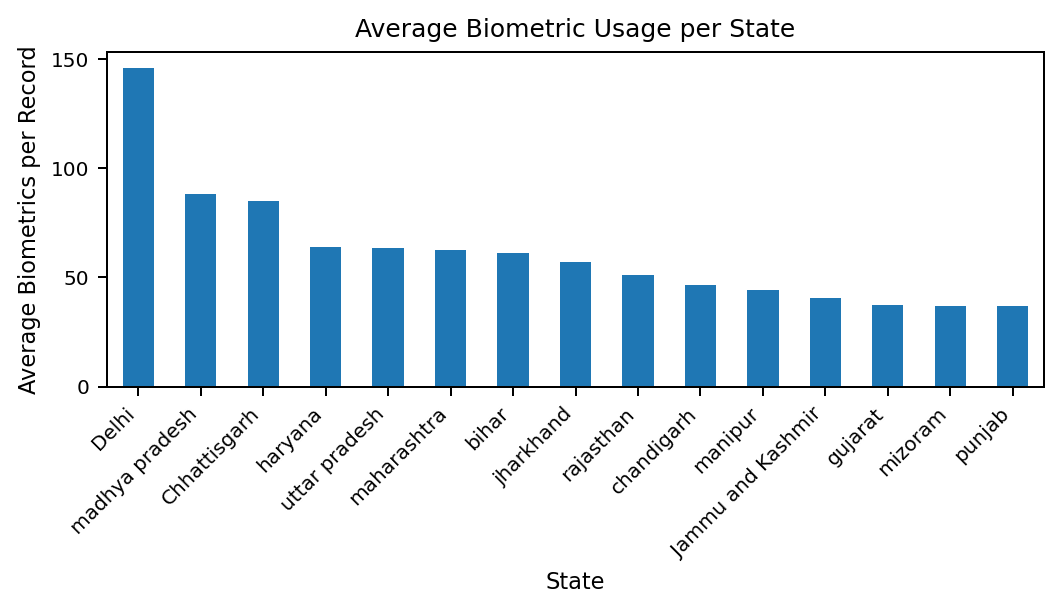

In [40]:
## 6. Average Biometric Usage per State
state_average = (
    df.groupby('state')['total_biometrics']
    .mean()
    .sort_values(ascending=False)
    .head(15)
)

plt.figure(figsize=(6, 3.5), dpi=180)
state_average.plot(kind='bar')
plt.title("Average Biometric Usage per State", fontsize=10)
plt.xlabel("State", fontsize=9)
plt.ylabel("Average Biometrics per Record", fontsize=9)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

### Average Biometric Usage per State

This bar chart shows the average number of biometric authentications per record for each state. Unlike total counts, this visualization highlights states where biometric usage intensity is higher.

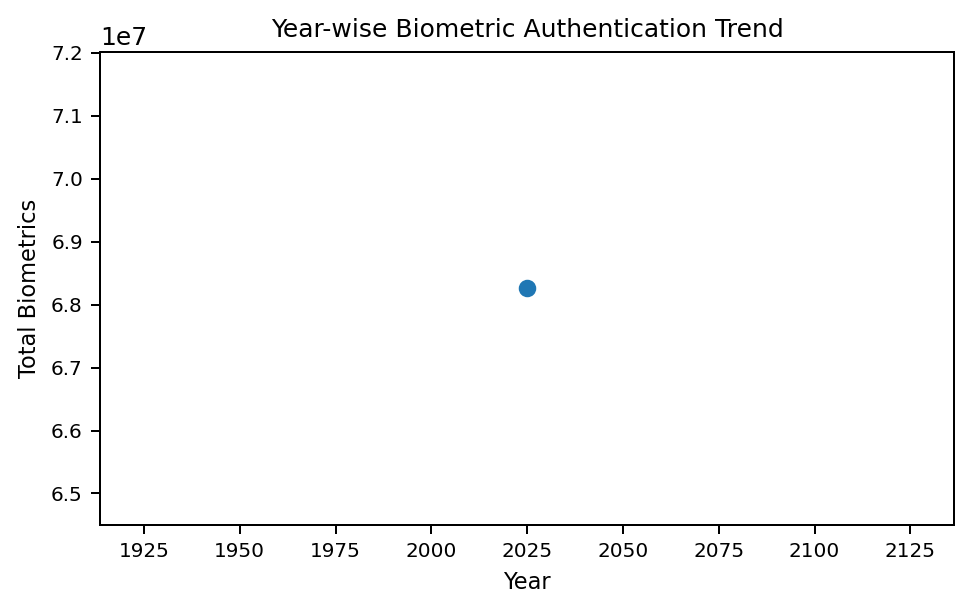

In [41]:
## 7. Year-wise Biometric Authentication Trend
df['year'] = df['date'].dt.year

yearly_trend = df.groupby('year')['total_biometrics'].sum()

plt.figure(figsize=(5.5, 3.5), dpi=180)
yearly_trend.plot(marker='o')
plt.title("Year-wise Biometric Authentication Trend", fontsize=10)
plt.xlabel("Year", fontsize=9)
plt.ylabel("Total Biometrics", fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

### Year-wise Biometric Authentication Trend

This line graph shows the trend of Aadhaar biometric authentication over the years. An upward trend indicates increasing adoption of biometric-based identity verification across India.